In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Define the directories
no_ins_dir = 'responses/no_ins'
with_ins_dir = 'responses/with_ins'

# Function to read all CSV files in a directory into a dictionary of DataFrames
def read_csvs_in_dir_to_dict(directory):
    dfs = {}
    for filename in os.listdir(directory):
        if filename.endswith('.csv'):
            df = pd.read_csv(os.path.join(directory, filename))
            dfs[filename] = df
    return dfs

# Read the CSV files
no_ins_dfs = read_csvs_in_dir_to_dict(no_ins_dir)
with_ins_dfs = read_csvs_in_dir_to_dict(with_ins_dir)

# Combine the dictionaries
dfs = {**no_ins_dfs, **with_ins_dfs}

In [4]:
for filename, _ in dfs.items():
    print(filename)

subject_noins_2.csv
subject-51_noins.csv
subject_noins_3.csv
subject-22_noins.csv
Lukas_27_10_noins_2.csv
subject-10_noins.csv
subject_noins_1.csv
subject_noins_4.csv
Lukas_27_10_noins_1.csv
Damian_with_ins.csv
subject-12_ins.csv
subject_withins_2.csv
subject_withins_4.csv
lukas_friend_with_ins.csv
subject_withins_1.csv


/home/matt/.local/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/matt/.local/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/matt/.local/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/matt/.local/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.

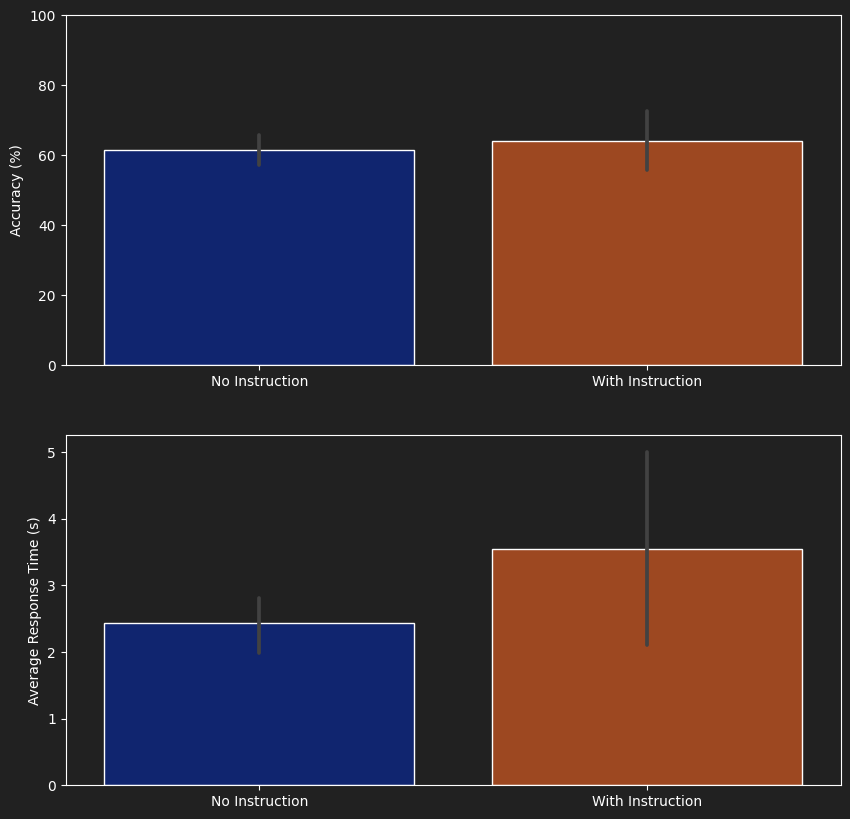

In [3]:
def create_graph(dfs):
    # Process each DataFrame and store data in a list of dictionaries
    data = [
        {
            'Instruction': 'No Instruction' if 'noins' in filename else 'With Instruction',
            'Accuracy': df[5:-2]['acc'].astype(float).iloc[-1],
            'Average Response Time': df[5:-2]['avg_rt'].astype(float).iloc[-1] / 1000,
            'Standard Deviation': df[5:-2]['response_time'].std()
        }
        for filename, df in dfs.items()
    ]

    # Create a DataFrame from the list of dictionaries
    plot_df = pd.DataFrame(data)

    fig, axs = plt.subplots(2,1,figsize=(10, 10))
    sns.set_style("dark")
    sns.set_palette('dark')
    
    # Create bar plots
    for i, metric in enumerate(['Accuracy', 'Average Response Time']):
        sns.barplot(x='Instruction', y=metric, data=plot_df, ax=axs[i])
        axs[i].set_xlabel('')
        axs[i].set_ylabel(f'{metric} (%)' if metric == 'Accuracy' else f'{metric} (s)')
        axs[i].set_facecolor('#212121')
        axs[i].tick_params(color='white', labelcolor='white')
        for spine in axs[i].spines.values():
            spine.set_edgecolor('white')
        axs[i].yaxis.label.set_color('white')
        axs[i].xaxis.label.set_color('white')

    # Set y-axis limits for accuracy plot and set figure background color
    axs[0].set_ylim([0, 100])
    fig.patch.set_facecolor('#212121')

    plt.savefig('plot.png', transparent=True)
    plt.show()

# Call the function with dictionary of DataFrames
create_graph(dfs)
